#Análise de Microdados do ENEM

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
mediaEnemPorMunicipio = pd.read_csv('mediaEnemPorMunicipio.csv', sep=',')

In [107]:
mediaEnemPorMunicipio.head()

,Unnamed: 0,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081
1,1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147
2,2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821
3,3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074
4,4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222


In [108]:
mediaEnemPorMunicipio = pd.read_csv('mediaEnemPorMunicipio.csv', sep=',', index_col=0)

In [109]:
mediaEnemPorMunicipio.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222


In [110]:
#importando dados IDHM

In [121]:
atlasHumano = pd.read_csv('dados_brutos.csv', sep=';')

In [122]:
atlasHumano

,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2010,11,110001,1100015,ALTA FLORESTA D'OESTE,"0,641","0,526","0,763","0,657"
1,2010,11,110002,1100023,ARIQUEMES,"0,702","0,600","0,806","0,716"
2,2010,11,110003,1100031,CABIXI,"0,650","0,559","0,757","0,650"
3,2010,11,110004,1100049,CACOAL,"0,718","0,620","0,821","0,727"
4,2010,11,110005,1100056,CEREJEIRAS,"0,692","0,602","0,799","0,688"
...,...,...,...,...,...,...,...,...,...
5560,2010,52,522200,5222005,VIANÓPOLIS,"0,712","0,622","0,818","0,710"
5561,2010,52,522205,5222054,VICENTINÓPOLIS,"0,684","0,562","0,804","0,707"
5562,2010,52,522220,5222203,VILA BOA,"0,647","0,534","0,818","0,619"
5563,2010,52,522230,5222302,VILA PROPÍCIO,"0,634","0,505","0,802","0,629"


In [123]:
colunasSelecionadas = ['ANO','UF', 'CODMUN6','CODMUN7','NOME_MUN','IDHM', 'IDHM_E','IDHM_L','IDHM_R']

In [124]:
atlasHumano = atlasHumano.filter(items= ['ANO','UF', 'Codmun6','Codmun7','Municipio','IDHM', 'IDHM_E','IDHM_L','IDHM_R'])

In [125]:

atlasHumano.head()

,ANO,UF,Codmun6,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2010,11,110001,1100015,"0,641","0,526","0,763","0,657"
1,2010,11,110002,1100023,"0,702","0,600","0,806","0,716"
2,2010,11,110003,1100031,"0,650","0,559","0,757","0,650"
3,2010,11,110004,1100049,"0,718","0,620","0,821","0,727"
4,2010,11,110005,1100056,"0,692","0,602","0,799","0,688"


In [127]:
pd.merge(mediaEnemPorMunicipio, atlasHumano, how = 'left',left_on = ['CO_MUNICIPIO_RESIDENCIA'], right_on = ['Codmun7'])

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun6,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,2010.0,11.0,110001.0,1100015.0,"0,641","0,526","0,763","0,657"
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,2010.0,11.0,110002.0,1100023.0,"0,702","0,600","0,806","0,716"
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821,2010.0,11.0,110003.0,1100031.0,"0,650","0,559","0,757","0,650"
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074,2010.0,11.0,110004.0,1100049.0,"0,718","0,620","0,821","0,727"
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222,2010.0,11.0,110005.0,1100056.0,"0,692","0,602","0,799","0,688"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,467.945495,492.496537,512.282684,528.815315,563.896104,2010.0,52.0,522200.0,5222005.0,"0,712","0,622","0,818","0,710"
5566,5222054,Vicentinópolis,52,GO,443.824194,469.941270,489.447619,504.204839,503.492063,2010.0,52.0,522205.0,5222054.0,"0,684","0,562","0,804","0,707"
5567,5222203,Vila Boa,52,GO,433.489130,446.955102,469.622449,474.306522,465.714286,2010.0,52.0,522220.0,5222203.0,"0,647","0,534","0,818","0,619"
5568,5222302,Vila Propício,52,GO,450.603636,464.472414,480.539655,474.847273,460.689655,2010.0,52.0,522230.0,5222302.0,"0,634","0,505","0,802","0,629"


In [128]:
mediaEnemIDHM = pd.merge(mediaEnemPorMunicipio, atlasHumano, how = 'left',left_on = ['CO_MUNICIPIO_RESIDENCIA'], right_on = ['Codmun7'])

In [133]:
mediaEnemIDHM

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun6,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,2010.0,11.0,110001.0,1100015.0,"0,641","0,526","0,763","0,657"
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,2010.0,11.0,110002.0,1100023.0,"0,702","0,600","0,806","0,716"
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821,2010.0,11.0,110003.0,1100031.0,"0,650","0,559","0,757","0,650"
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074,2010.0,11.0,110004.0,1100049.0,"0,718","0,620","0,821","0,727"
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222,2010.0,11.0,110005.0,1100056.0,"0,692","0,602","0,799","0,688"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,467.945495,492.496537,512.282684,528.815315,563.896104,2010.0,52.0,522200.0,5222005.0,"0,712","0,622","0,818","0,710"
5566,5222054,Vicentinópolis,52,GO,443.824194,469.941270,489.447619,504.204839,503.492063,2010.0,52.0,522205.0,5222054.0,"0,684","0,562","0,804","0,707"
5567,5222203,Vila Boa,52,GO,433.489130,446.955102,469.622449,474.306522,465.714286,2010.0,52.0,522220.0,5222203.0,"0,647","0,534","0,818","0,619"
5568,5222302,Vila Propício,52,GO,450.603636,464.472414,480.539655,474.847273,460.689655,2010.0,52.0,522230.0,5222302.0,"0,634","0,505","0,802","0,629"


In [134]:
mediaEnemIDHM.dtypes


CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
ANO                        float64
UF                         float64
Codmun6                    float64
Codmun7                    float64
IDHM                        object
IDHM_E                      object
IDHM_L                      object
IDHM_R                      object
dtype: object

In [135]:
#é necessário substituir a virgula por ponto nos floats

In [141]:
mediaEnemIDHM['IDHM'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_R'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_E'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_L'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))

In [140]:
numero = '0,651'
str(numero).replace(',','.')

'0.651'

In [142]:
mediaEnemIDHM.dtypes


CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
ANO                        float64
UF                         float64
Codmun6                    float64
Codmun7                    float64
IDHM                       float64
IDHM_E                     float64
IDHM_L                     float64
IDHM_R                     float64
dtype: object

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='IDHM'>

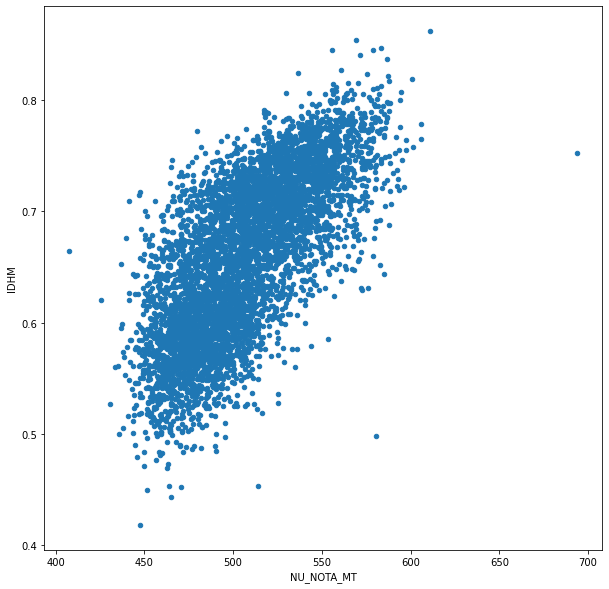

In [145]:
mediaEnemIDHM.plot.scatter('NU_NOTA_MT', 'IDHM',figsize = (10,10))

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

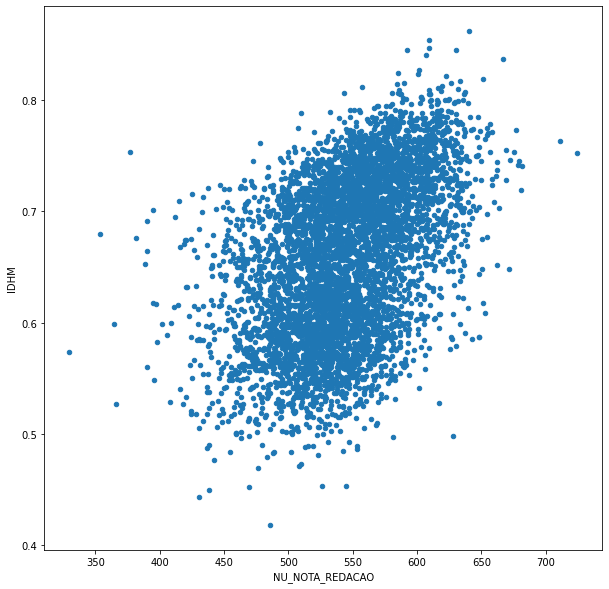

In [146]:
mediaEnemIDHM.plot.scatter('NU_NOTA_REDACAO', 'IDHM',figsize = (10,10))

In [149]:
mean_REDACAO = mediaEnemIDHM.NU_NOTA_REDACAO.mean()
mean_IDHM = mediaEnemIDHM.IDHM.mean()

In [150]:
mean_REDACAO

544.1045349735814

In [151]:
mean_IDHM

0.6591574123989219

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

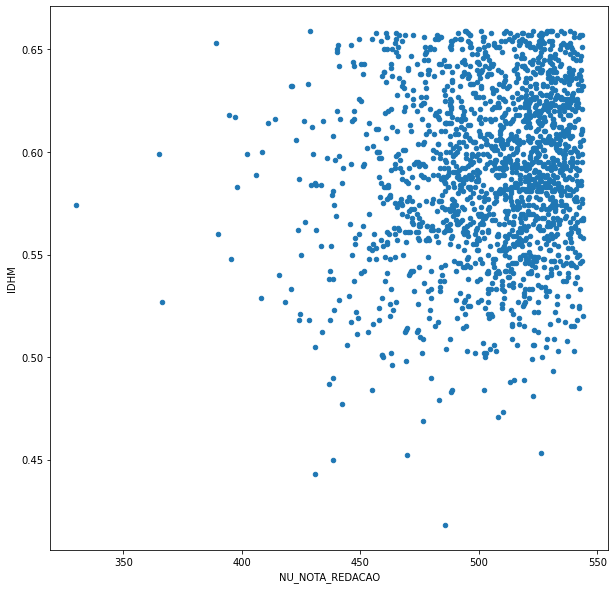

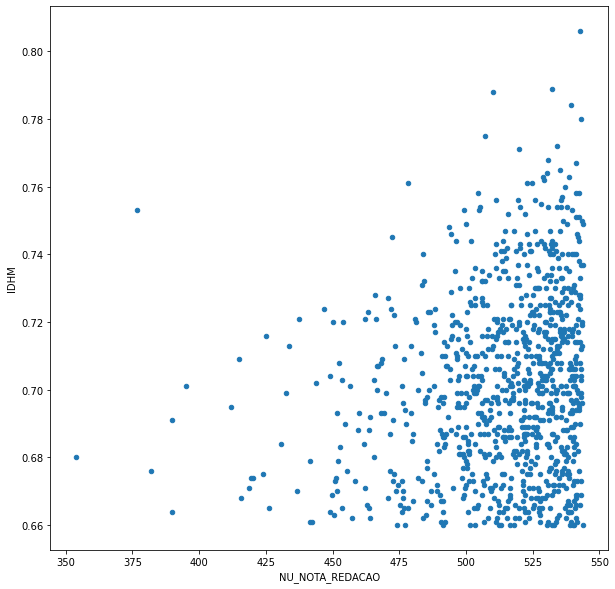

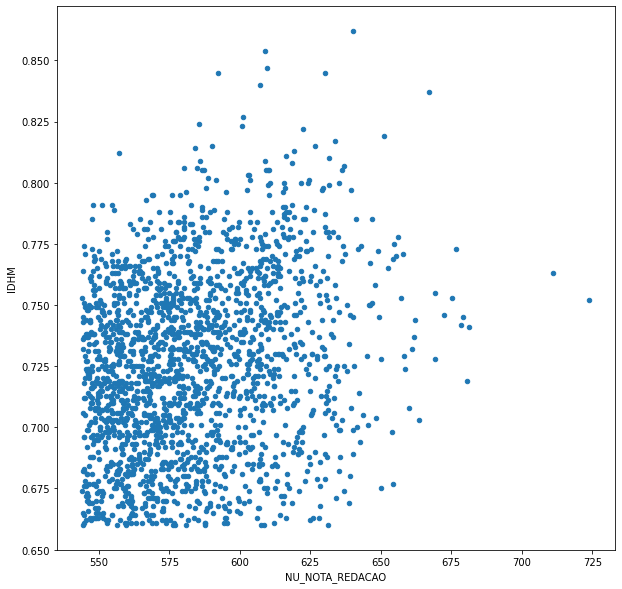

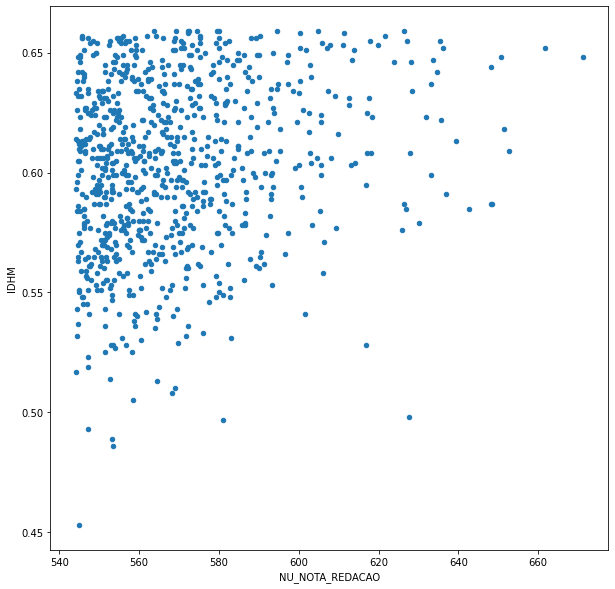

In [157]:
idhmMunicipio = mediaEnemIDHM.IDHM
notaMunicipio = mediaEnemIDHM.NU_NOTA_REDACAO


#IDHM baixo e Média Baixa
quadrante1 = (idhmMunicipio < mean_IDHM) & (notaMunicipio < mean_REDACAO)

#IDHM alto e Média Baixa
quadrante2 = (idhmMunicipio > mean_IDHM) & (notaMunicipio < mean_REDACAO)

#IDHM alto e Média alta
quadrante3 = (idhmMunicipio > mean_IDHM) & (notaMunicipio > mean_REDACAO)

#IDHM baixo e Média alta
quadrante4 = (idhmMunicipio < mean_IDHM) & (notaMunicipio > mean_REDACAO)



mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO', 'IDHM',figsize = (10,10))

mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO', 'IDHM',figsize = (10,10))

mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO', 'IDHM',figsize = (10,10))

mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO', 'IDHM',figsize = (10,10))

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

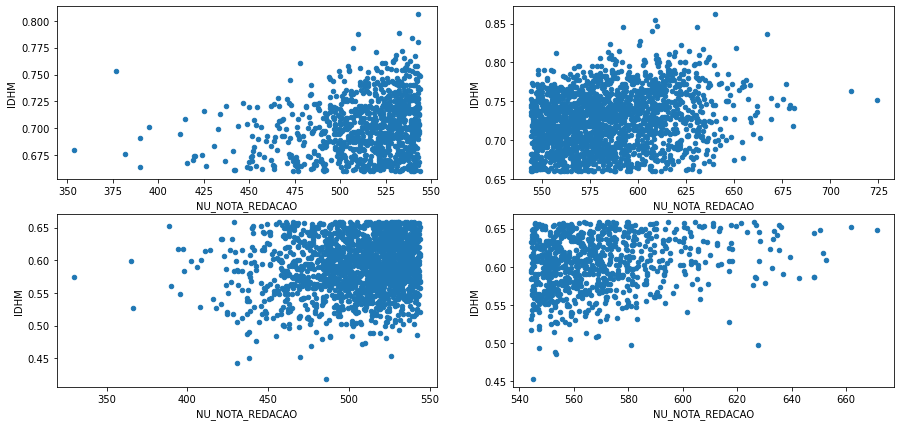

In [160]:
idhmMunicipio = mediaEnemIDHM.IDHM
notaMunicipio = mediaEnemIDHM.NU_NOTA_REDACAO


#IDHM baixo e Média Baixa
quadrante1 = (idhmMunicipio < mean_IDHM) & (notaMunicipio < mean_REDACAO)

#IDHM alto e Média Baixa
quadrante2 = (idhmMunicipio > mean_IDHM) & (notaMunicipio < mean_REDACAO)

#IDHM alto e Média alta
quadrante3 = (idhmMunicipio > mean_IDHM) & (notaMunicipio > mean_REDACAO)

#IDHM baixo e Média alta
quadrante4 = (idhmMunicipio < mean_IDHM) & (notaMunicipio > mean_REDACAO)

fig, ax = plt.subplots(2, 2, figsize = (15, 7))

mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[1, 0])

mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[0, 0])

mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[0, 1])

mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[1, 1])

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

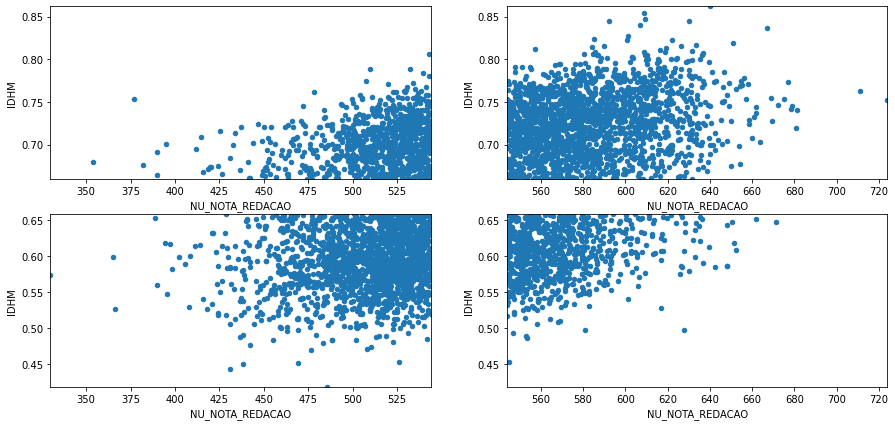

In [176]:
fig, ax = plt.subplots(2, 2, figsize = (15, 7))

minRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.min()
maxRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.max()
minIDHM = mediaEnemIDHM.IDHM.min()
maxIDHM = mediaEnemIDHM.IDHM.max()

mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[1, 0], xlim = (minRedacao, mean_REDACAO), ylim = (minIDHM, mean_IDHM))

mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[0, 0], xlim = (minRedacao, mean_REDACAO), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[0, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[1, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (minIDHM, mean_IDHM))

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

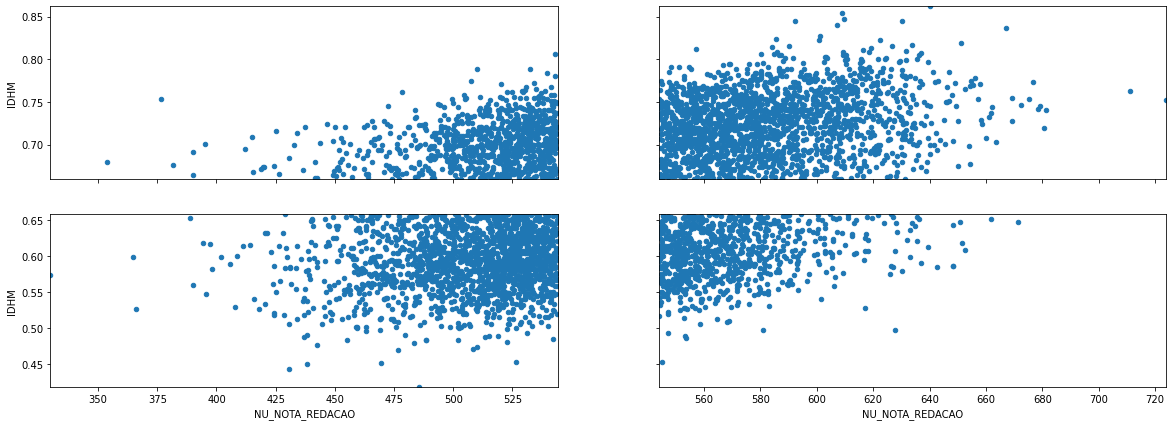

In [177]:
#IDHM baixo e Média Baixa
quadrante1 = (idhmMunicipio < mean_IDHM) & (notaMunicipio < mean_REDACAO)

#IDHM alto e Média Baixa
quadrante2 = (idhmMunicipio > mean_IDHM) & (notaMunicipio < mean_REDACAO)

#IDHM alto e Média alta
quadrante3 = (idhmMunicipio > mean_IDHM) & (notaMunicipio > mean_REDACAO)

#IDHM baixo e Média alta
quadrante4 = (idhmMunicipio < mean_IDHM) & (notaMunicipio > mean_REDACAO)

fig, ax = plt.subplots(2, 2, figsize = (20, 7), sharex = 'col', sharey='row')

minRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.min()
maxRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.max()
minIDHM = mediaEnemIDHM.IDHM.min()
maxIDHM = mediaEnemIDHM.IDHM.max()

mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[1, 0], xlim = (minRedacao, mean_REDACAO), ylim = (minIDHM, mean_IDHM))

mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[0, 0], xlim = (minRedacao, mean_REDACAO), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[0, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO', 'IDHM',ax = ax[1, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (minIDHM, mean_IDHM))

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

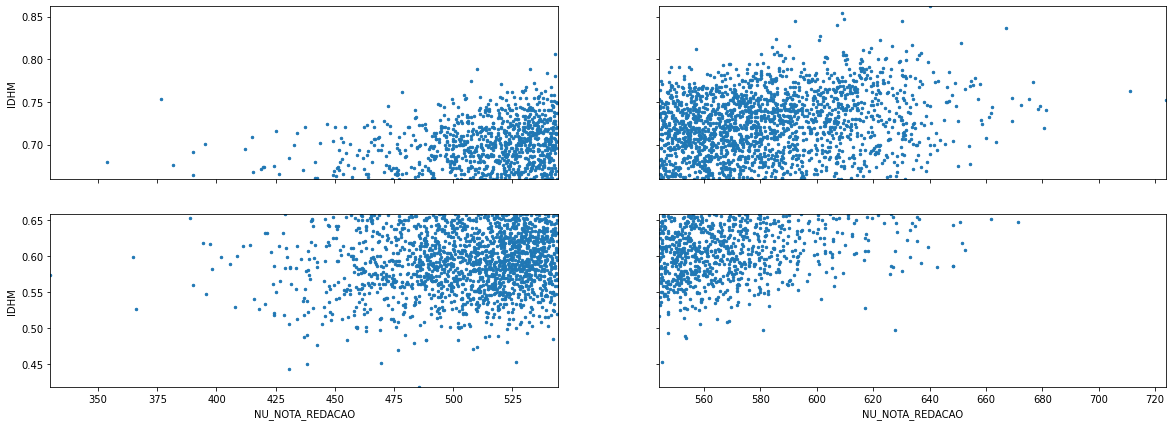

In [175]:
fig, ax = plt.subplots(2, 2, figsize = (20, 7), sharex = 'col', sharey='row')

minRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.min()
maxRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.max()
minIDHM = mediaEnemIDHM.IDHM.min()
maxIDHM = mediaEnemIDHM.IDHM.max()

mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO', 'IDHM',s=6,ax = ax[1, 0], xlim = (minRedacao, mean_REDACAO), ylim = (minIDHM, mean_IDHM))

mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO', 'IDHM',s=6,ax = ax[0, 0], xlim = (minRedacao, mean_REDACAO), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO', 'IDHM',s=6,ax = ax[0, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO', 'IDHM',s=6,ax = ax[1, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (minIDHM, mean_IDHM))

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

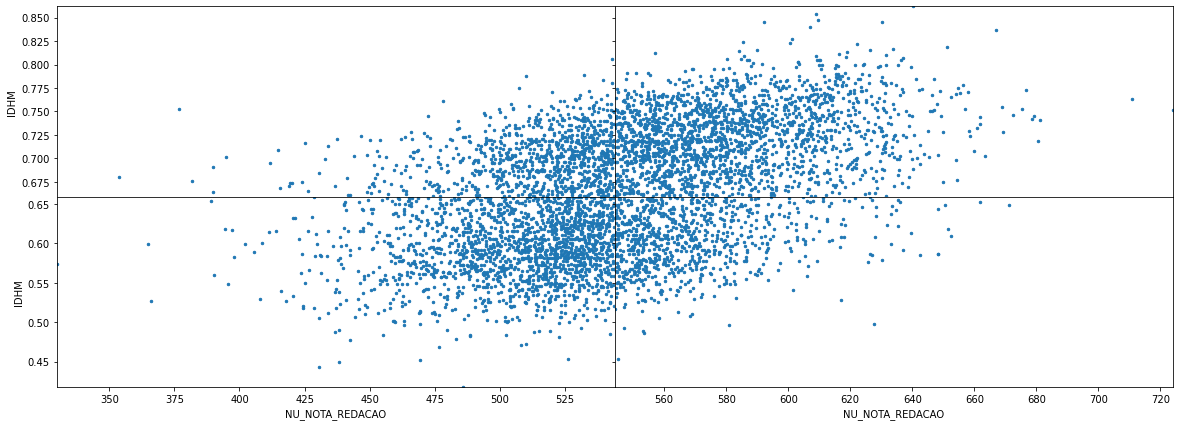

In [174]:
fig, ax = plt.subplots(2, 2, figsize = (20, 7), sharex = 'col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)

minRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.min()
maxRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.max()
minIDHM = mediaEnemIDHM.IDHM.min()
maxIDHM = mediaEnemIDHM.IDHM.max()

mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO', 'IDHM',s=6,ax = ax[1, 0], xlim = (minRedacao, mean_REDACAO), ylim = (minIDHM, mean_IDHM))

mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO', 'IDHM',s=6,ax = ax[0, 0], xlim = (minRedacao, mean_REDACAO), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO', 'IDHM',s=6,ax = ax[0, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO', 'IDHM',s=6,ax = ax[1, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (minIDHM, mean_IDHM))

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

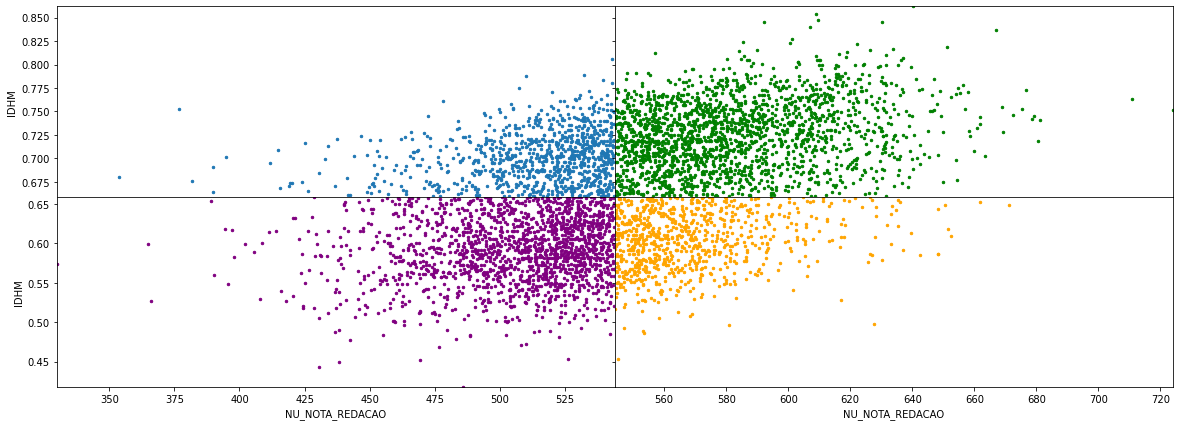

In [180]:
fig, ax = plt.subplots(2, 2, figsize = (20, 7), sharex = 'col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)

minRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.min()
maxRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.max()
minIDHM = mediaEnemIDHM.IDHM.min()
maxIDHM = mediaEnemIDHM.IDHM.max()

mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO', 'IDHM',color='purple', s=6,ax = ax[1, 0], xlim = (minRedacao, mean_REDACAO), ylim = (minIDHM, mean_IDHM))

mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO', 'IDHM',s=6,ax = ax[0, 0], xlim = (minRedacao, mean_REDACAO), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO', 'IDHM',color='green', s=6,ax = ax[0, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO', 'IDHM',color='orange', s=6,ax = ax[1, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (minIDHM, mean_IDHM))

quadrante 1: 32.28007181328546%, baixo IDHM, baixa nota


<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

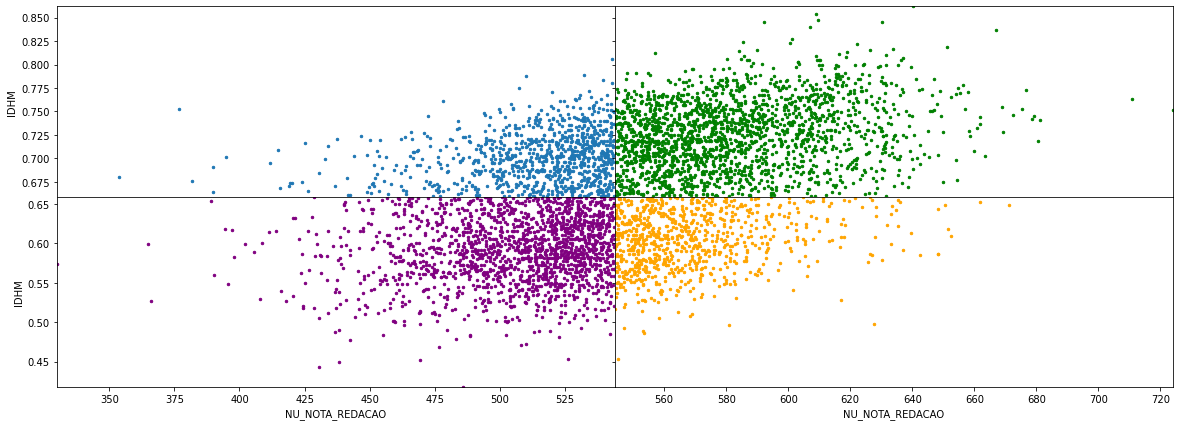

In [181]:
fig, ax = plt.subplots(2, 2, figsize = (20, 7), sharex = 'col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)

minRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.min()
maxRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.max()
minIDHM = mediaEnemIDHM.IDHM.min()
maxIDHM = mediaEnemIDHM.IDHM.max()

mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
print("quadrante 1: {}%, baixo IDHM, baixa nota".format(100*len(mediaEnemIDHM1.IDHM)/len(idhmMunicipio)))
mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO', 'IDHM',color='purple', s=6,ax = ax[1, 0], xlim = (minRedacao, mean_REDACAO), ylim = (minIDHM, mean_IDHM))

mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
print("quadrante 2: {}%, baixo IDHM, baixa nota".format(100*len(mediaEnemIDHM1.IDHM)/len(idhmMunicipio)))
mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO', 'IDHM',s=6,ax = ax[0, 0], xlim = (minRedacao, mean_REDACAO), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
print("quadrante 1: {}%, baixo IDHM, baixa nota".format(100*len(mediaEnemIDHM1.IDHM)/len(idhmMunicipio)))
mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO', 'IDHM',color='green', s=6,ax = ax[0, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (mean_IDHM, maxIDHM))

mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
print("quadrante 1: {}%, baixo IDHM, baixa nota".format(100*len(mediaEnemIDHM1.IDHM)/len(idhmMunicipio)))
mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO', 'IDHM',color='orange', s=6,ax = ax[1, 1], xlim = (mean_REDACAO, maxRedacao), ylim = (minIDHM, mean_IDHM))